In [38]:
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [39]:
wine = load_wine()
wine_data = wine.data
wine_target = wine.target
df_wine =pd.DataFrame(data = wine_data, columns = wine.feature_names)
df_target =pd.DataFrame(data = wine.target, columns = ['target'])
df_wine

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [40]:
df = pd.concat([df_wine, df_target], axis=1)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


<AxesSubplot:xlabel='target', ylabel='count'>

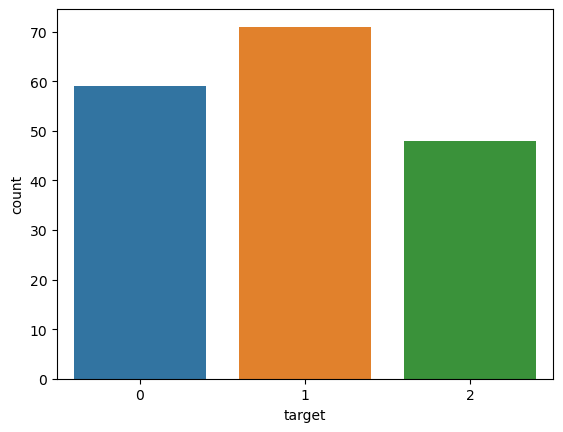

In [41]:
sns.countplot(data = df, x="target")

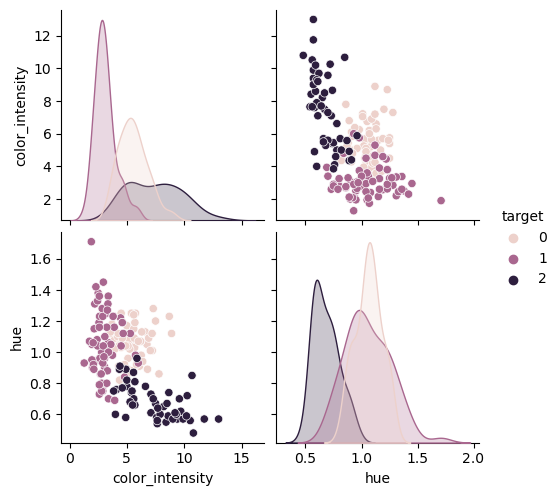

In [42]:
sns.pairplot(data = df, vars=['color_intensity', 'hue'], hue = 'target')

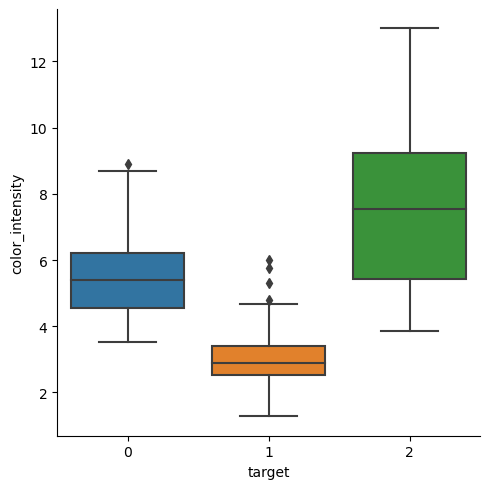

In [43]:
sns.catplot(data=df, y='color_intensity',x = 'target', kind='box')

In [44]:
x = df.iloc[:, [0, 1, 2, 3]].values

In [45]:
x

array([[14.23,  1.71,  2.43, 15.6 ],
       [13.2 ,  1.78,  2.14, 11.2 ],
       [13.16,  2.36,  2.67, 18.6 ],
       [14.37,  1.95,  2.5 , 16.8 ],
       [13.24,  2.59,  2.87, 21.  ],
       [14.2 ,  1.76,  2.45, 15.2 ],
       [14.39,  1.87,  2.45, 14.6 ],
       [14.06,  2.15,  2.61, 17.6 ],
       [14.83,  1.64,  2.17, 14.  ],
       [13.86,  1.35,  2.27, 16.  ],
       [14.1 ,  2.16,  2.3 , 18.  ],
       [14.12,  1.48,  2.32, 16.8 ],
       [13.75,  1.73,  2.41, 16.  ],
       [14.75,  1.73,  2.39, 11.4 ],
       [14.38,  1.87,  2.38, 12.  ],
       [13.63,  1.81,  2.7 , 17.2 ],
       [14.3 ,  1.92,  2.72, 20.  ],
       [13.83,  1.57,  2.62, 20.  ],
       [14.19,  1.59,  2.48, 16.5 ],
       [13.64,  3.1 ,  2.56, 15.2 ],
       [14.06,  1.63,  2.28, 16.  ],
       [12.93,  3.8 ,  2.65, 18.6 ],
       [13.71,  1.86,  2.36, 16.6 ],
       [12.85,  1.6 ,  2.52, 17.8 ],
       [13.5 ,  1.81,  2.61, 20.  ],
       [13.05,  2.05,  3.22, 25.  ],
       [13.39,  1.77,  2.62, 16.1 ],
 

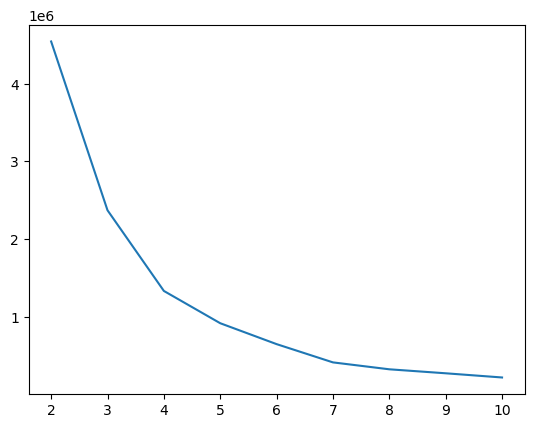

In [48]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
wcss = []
for i in range(2,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(2, 11), wcss)
plt.show()